<a href="https://colab.research.google.com/github/agmCorp/colab/blob/main/Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 67s 270ms/step - loss: 0.4944 - val_loss: 0.3113
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 59s 253ms/step - loss: 0.3050 - val_loss: 0.2977
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 59s 250ms/step - loss: 0.2935 - val_loss: 0.2902
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 84s 258ms/step - loss: 0.2870 - val_loss: 0.2856
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 80s 250ms/step - loss: 0.2831 - val_loss: 0.2829
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


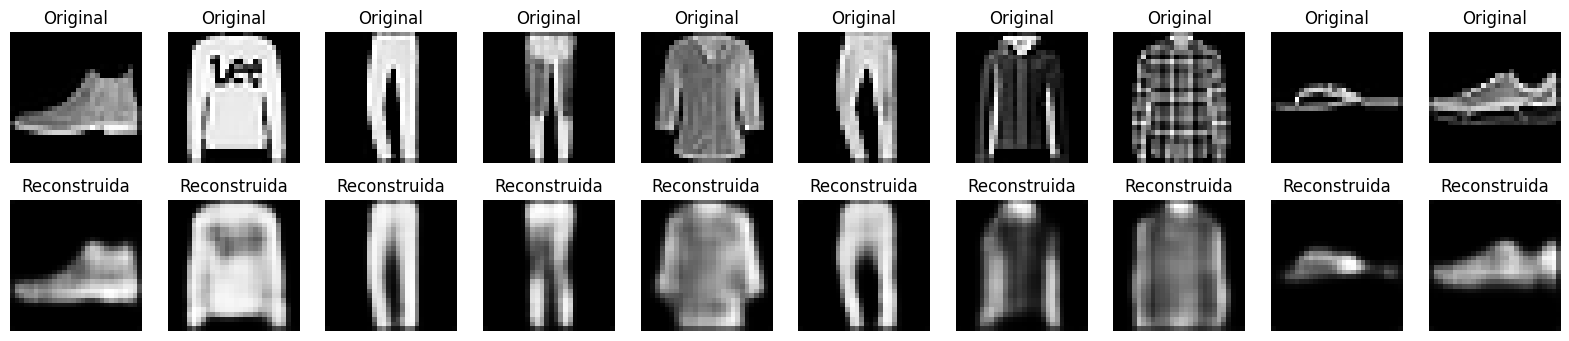

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

# Cargar el dataset Fashion MNIST
(x_train, _), (x_test, _) = tf.keras.datasets.fashion_mnist.load_data()

# Normalizar los valores a [0, 1]
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Redimensionar para que tengan canal (28, 28, 1)
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

# Crear el autoencoder
input_img = tf.keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = models.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Entrenar el autoencoder
autoencoder.fit(
    x_train, x_train,
    epochs=5,  # podés cambiarlo luego
    batch_size=256,
    shuffle=True,
    validation_data=(x_test, x_test)
)

# Reconstruir algunas imágenes
decoded_imgs = autoencoder.predict(x_test[:10])

# Mostrar original vs reconstruida
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis("off")

    # Reconstruida
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.title("Reconstruida")
    plt.axis("off")
plt.show()
